# Setup

In [1]:
!pip install datasets ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from pathlib import Path

In [3]:
def create_dirs():
    current_dir = Path.cwd()

    subdirs = [current_dir / name for name in ("saved_models",)]

    for subdir in subdirs:
        if not subdir.is_dir():
            print(f"Directory '{subdir}' not found. Creating it...")
            subdir.mkdir(parents=True)
            print(f"Created!")

def download_model():
    import requests
    import zipfile
    import os
    from time import sleep

    url = "https://www.dropbox.com/scl/fi/9onrcs3kq1am7nxa3p7gt/saved_model.zip?rlkey=93xfh2smwdsnhjh14jy6dol5q&st=nd4uad3t&dl=0"
    # download model from Dropbox
    try:
        os.system(f"wget -O saved_model.zip {url}")
    except Exception as e:
        print(f"Exception occurred: {e}.")
        if (Path.is_file("saved_model.zip")):
            print("Deleting partially downloaded file...")
            os.remove("saved_model.zip")

    sleep(10)
    with zipfile.ZipFile("saved_model.zip", "r") as zip_ref:
        zip_ref.extractall(model_base_dir)

    os.remove("saved_model.zip")

def setup():
    create_dirs()

    if not model_base_dir.exists() or not any(model_base_dir.iterdir()):
        print("Model not found. Downloading it...")
        download_model()
        print("Downloaded!")

def remove_setup():
    import shutil
    if model_base_dir.exists():
        shutil.rmtree(model_base_dir)
        print(f"Removed directory: {model_base_dir}")
    else:
        print(f"Directory {model_base_dir} does not exist. Nothing to remove.")

model_base_dir = Path.cwd() / "saved_models" / "640"
load_model_dir = model_base_dir / "yolo11n_saved_model"

# remove setup
remove_setup()

setup()

Directory /content/saved_models/640 does not exist. Nothing to remove.
Directory '/content/saved_models' not found. Creating it...
Created!
Model not found. Downloading it...
Downloaded!


# Execution

In [4]:

from datasets import load_dataset

raw_dataset = load_dataset("ilsilfverskiold/traffic-camera-norway-images")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/590 [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/288M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/288M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/63.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6103 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/679 [00:00<?, ? examples/s]

In [13]:
import numpy as np
from PIL import Image
import tensorflow as tf
import numpy as np

# Cargar modelo
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO(load_model_dir, task= 'detect')
model.conf = 0.7
# model.iou = 0.1


0: 640x640 6 cars, 1 truck, 272.4ms
Speed: 5.1ms preprocess, 272.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
{'x1': 195.34309, 'y1': 377.48041, 'x2': 327.29636, 'y2': 469.65649}
{'x1': 148.61606, 'y1': 497.9707, 'x2': 331.05258, 'y2': 574.07452}
{'x1': 427.98163, 'y1': 285.86075, 'x2': 458.69785, 'y2': 306.13214}


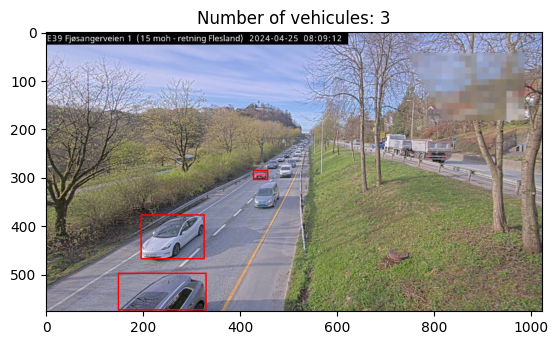

In [21]:
# Cargar imagen de prueba
image = raw_dataset['train'][12]['image']

results = model(image)[0].to_df()

# Filter using the minimum confidence of the model (the threshold)
results = results[results["confidence"] >= model.conf]

from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

boxes = results["box"].values
conf = results["confidence"].values
classes = results["class"].values
index_list = [2,3,5,7]

draw = ImageDraw.Draw(image)

num_objects = len(boxes)

for box in boxes:
  print(box)
  xmin, ymin, xmax, ymax = box.values()
  draw.rectangle([(xmin, ymin), (xmax, ymax)], outline = 'red', width=3)


array_image = np.array(image)
plt.title(f'Number of vehicules: {num_objects}')
plt.imshow(array_image)